In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("../1_House_Price_Project_X/train.csv")
test = pd.read_csv("../1_House_Price_Project_X/test.csv")

## 1.EDA

### 1) Introduction

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
test.tail()

In [ ]:
train.describe()

In [ ]:
print(len(train.columns), train.columns)

In [ ]:
print(len(test.columns), test.columns)

In [ ]:
numberic_features = []
categoric_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numberic_features.append(f)
    else:
        categoric_features.append(f)

In [ ]:
print(len(numberic_features), numberic_features)
print(len(categoric_features), categoric_features)

In [ ]:
numberic_features.remove("Id")
numberic_features.remove("SalePrice")
len(numberic_features), numberic_features

In [10]:
# https://plot.ly/python/getting-started/#initialization-for-offline-plotting
import plotly.graph_objs as go
import plotly.offline as py
import plotly

from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

# 수정
n_unique = []

for column in train:
    n_unique.append(len(train[column].unique()))

#unique_features_len = pd.DataFrame(n_unique, index = train.columns, columns = ['Unique'])

unique_features_len = pd.Series(n_unique , index = train.columns)

trace = go.Scatter(
        x = unique_features_len.values,
        y = unique_features_len.index,
        mode = 'markers',
        marker = dict(
                size = '14',
                color = np.random.randn(78))
        )

layout = go.Layout(
    
        title = 'Unique Features',
        xaxis = dict(
                title = 'Count',),
        )
fig = go.Figure(data = [trace], layout = layout)
plotly.offline.iplot(fig)



In [11]:
trace = go.Histogram(
        x = train['Neighborhood'],
        marker = dict(
                color = 'red'
                     ),
                     )
layout = go.Layout(
        title = 'Frequency of Neighbors',
        xaxis = dict(title = 'Names',),
        yaxis = dict(title = 'Frequency'))

fig = go.Figure(data = [trace], layout = layout)

py.iplot(fig)

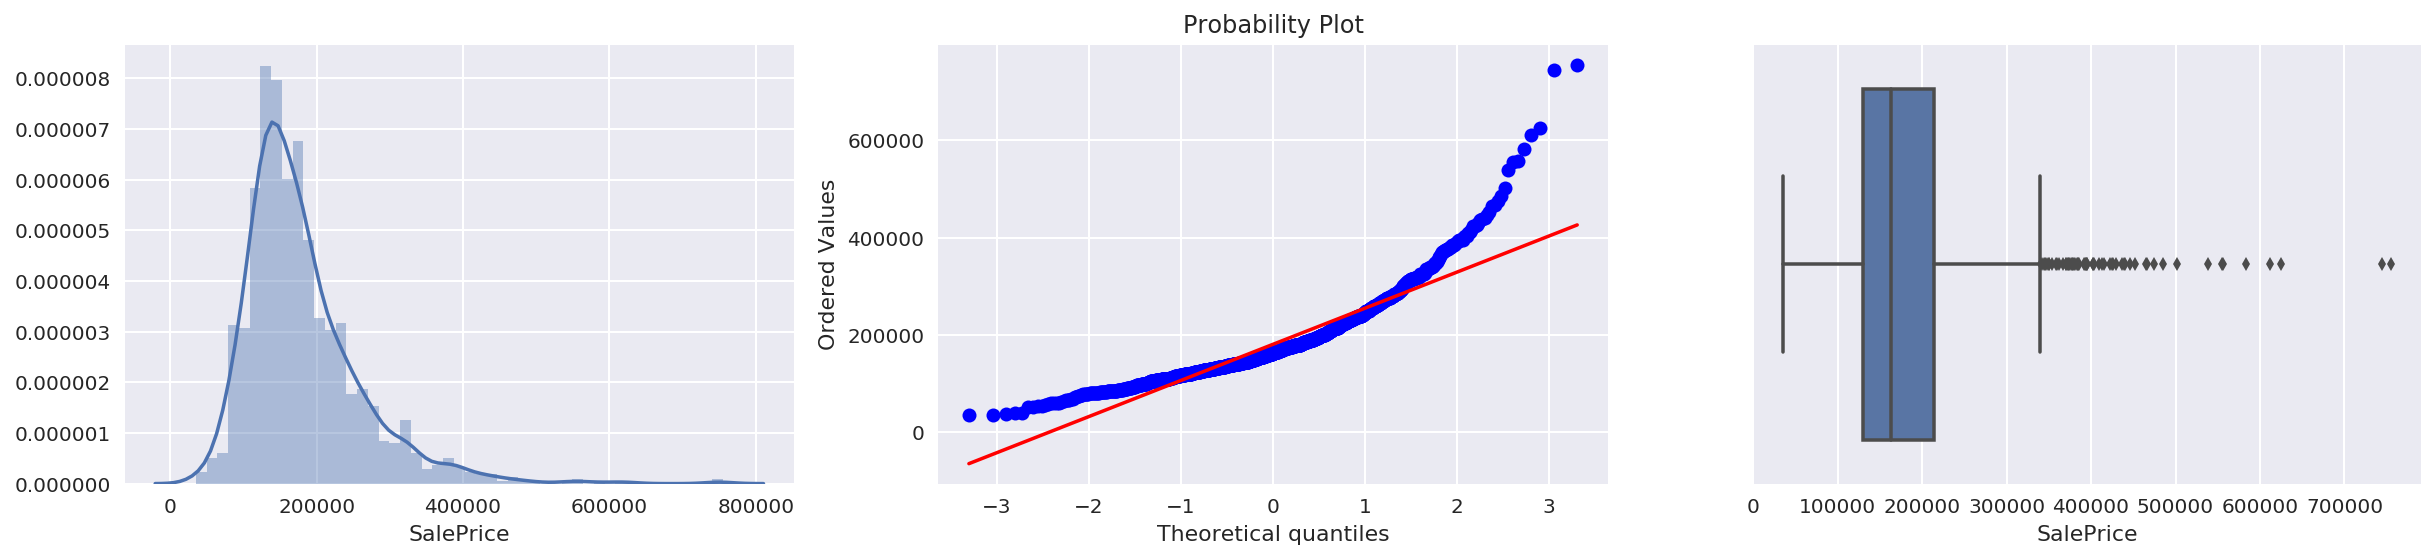

In [5]:
plt.figure(figsize=(17,4))

plt.subplot(131)
train["SalePrice"].describe()
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers(data, feature):
    outlier_list = []
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
        
    outlier_lenth = 1.5 * IQR
        
    outliers = data[(data[feature] < Q1 - outlier_lenth) | (data[feature] > Q3 + outlier_lenth)].index
    
    outlier_list.append(outliers)

    return outlier_list   #카운트 몇개인지?

In [ ]:
Saleprice_outlier = detect_outliers(train, "SalePrice")
Saleprice_outlier

### 2) 변수들 간의 관계

In [ ]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)
plt.show()

In [ ]:
df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
g = sns.stripplot(x = 'GrLivArea', y = 'SalePrice', hue="2ndFloor", data = df_train, alpha = 0.5)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_title('GrLiv & 2ndFloor - SalePrice')
# g.set_xticklabels(rotation=45)

plt.subplot(122)
b = sns.stripplot(x = 'GrLivArea', y = 'SalePrice', hue="Basement", data = df_train, alpha = 0.5)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
b.set_title('GrLiv & Basement - SalePrice')
# b.set_xticklabels(rotation=45)

plt.show()

In [ ]:
GrLivArea_outlier = detect_outliers(train, "GrLivArea")
GrLivArea_outlier

Find : 1. Grliv 넓이가 중간 아래부분까지는 같은 넓이의 집은 2층보다 1층집의 값 더 비싼것을 알수 있었다
       2. 베이스먼트가 없는집은 거의 없으며, 집값에는 영향이 없는것 같다 

In [ ]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,10+1):
    index = train.OverallQual == qual
    ax1.scatter( train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend()

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)


In [ ]:
OverallQual_outlier = detect_outliers(train, "OverallQual")
OverallQual_outlier

Find : 1. 품질과 집값은 선형관계를 발견할 수 있으나 overall condition과 집값은 관계가 없는것을 발견할 수 있었음

In [ ]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(train.GarageArea.loc[index], train.SalePrice.loc[index], data=train, label= car, alpha =0.5)
ax1.legend()


ax2 = plt.subplot(1,2,2)
ax2.scatter(x = "GarageCars", y = "SalePrice", data=train)

plt.show()

In [ ]:
GarageCars_outlier = detect_outliers(train, "GarageCars")
GarageCars_outlier

### Neighborhood

In [ ]:
Neighborhood = pd.concat([train['Neighborhood'], train["SalePrice"]], axis=1)
Neighborbood = Neighborhood.sort_values("SalePrice", ascending=False)
Neighborbood
# Neighborhood.sort_values("Neighborhood")

In [ ]:
plt.figure(figsize = (8, 12))
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighborhood, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [ ]:
def Gp_Neighborhood(saleprice):
    if saleprice > 250000:
        return "first_group"
    elif saleprice > 200000:
        return "second_group"
    elif saleprice > 150000:
        return "third_group"
    else: 
        return "fourth_group"

In [ ]:
train["Gp_Neighborhood"] = train["SalePrice"].apply(Gp_Neighborhood)
g = sns.factorplot(x="Gp_Neighborhood", y="SalePrice", data=train, kind="bar")
g.fig.set_size_inches(15,5)
plt.show()

### Year

In [ ]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
ax2.scatter(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5)
ax3 = plt.subplot(1,2,2)
ax3.scatter(x = train['YearBuilt'], y = train['YrSold'], alpha = 0.5)
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax4.scatter(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5)
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

Find

1.

### Fireplace

In [ ]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = train["FireplaceQu"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6, ax=ax4)

ax5 = plt.subplot(2,1,2)
ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
plt.show()


Find

1.

### BsmtBath

BsmtFullBath : 지하실 가득한 욕실  
BsmtHalfBath : 지하 욕실 반 화장실

In [ ]:
plt.subplot(121)
sns.boxplot(x = "BsmtFullBath", y = "SalePrice", data=train)

plt.subplot(122)
sns.boxplot(x = "BsmtHalfBath", y = "SalePrice", data=train)

In [ ]:
test = np.log1p(train.BsmtFullBath)
stats.probplot(test, plot=plt)
# stats.probplot(train["BsmtFullBath"], plot=plt)
# stats.probplot(train["BsmtHalfBath"], plot=plt)

In [ ]:
stats.probplot(train["BsmtFullBath"], plot=plt)

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

### TotRm and Bedroom

In [ ]:
plt.subplot(121)
sns.boxplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train)

plt.subplot(122)
sns.boxplot(x = "BedroomAbvGr", y = "SalePrice", data=train)

확실히 TotRmsAbvGrd 는 연관관계가 있는것으로 보임

In [ ]:
stats.probplot(train["TotRmsAbvGrd"], plot=plt)
stats.probplot(train["BedroomAbvGr"], plot=plt)

In [ ]:
train[['TotRmsAbvGrd', 'BedroomAbvGr']].hist(bins=80, figsize=(10,5))

Tot : 길게 하나 하고, 어떤 방이 여기에 포함되어있는지 확인필요

이런 데이터의 경우에는 확실히 한단계 데이터 조치가 필요할것으로 보임
이런 경우는 어떻게 해야하지?

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

### 아웃라이어제거

In [ ]:
# Saleprice_outlier

# GrLivArea_outlier,

# GarageCars_outlier,

# OverallQual_outlier

### Encoding

In [ ]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
categoric_encoded = []
for q in categoric_features:  
    encode(train, q)
    categoric_encoded.append(q+'_E')
print(categoric_encoded)

In [ ]:
corrmat = train.corr()
corrmat

In [ ]:
import missingno as msno

missingValueColumns = train.columns[train.isnull().any()].tolist()
msno.heatmap(train[missingValueColumns],figsize=(20,20))

In [ ]:
cols = corrmat.nlargest(30, 'SalePrice')['SalePrice'].index
cols

In [ ]:
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

In [ ]:
cols = corrmat.nlargest(20, 'SalePrice')['SalePrice'].index 
cols

In [ ]:
cm = np.corrcoef(train[cols].values.T)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',\
              annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.plot()

In [ ]:
for c in cols:
    data = pd.concat([train['SalePrice'], train[c]],axis=1)
    data.plot.scatter(x=c, y='SalePrice',ylim=(0,800000));

In [ ]:
# all_data[(all_data['GarageCars']==4) & (all_data['SalePrice'] < 300000)]

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(30)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [ ]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop('SalePrice', axis=1, inplace=True)
all_data.drop('Id', axis=1, inplace=True)

In [ ]:
all_data.shape

In [ ]:
all_data.tail()

In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data.head(50)

In [ ]:
# # non data 처리 방법 
# all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

# all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

# all_data["Alley"] = all_data["Alley"].fillna("None")

# all_data["Fence"] = all_data["Fence"].fillna("None")

# all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))

# for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
#     all_data[col] = all_data[col].fillna('None')

# for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
#     all_data[col] = all_data[col].fillna(0)
    
# for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
#     all_data[col] = all_data[col].fillna(0)

# for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
#     all_data[col] = all_data[col].fillna('None')

# all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
# all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

# all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# all_data = all_data.drop(['Utilities'], axis=1)

# all_data["Functional"] = all_data["Functional"].fillna("Typ")

# all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

# all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
# all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

# all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

In [ ]:
all_data.shape

In [ ]:
X_train = all_data[:train.shape[0]]
X_train.shape

In [ ]:
X_test = all_data[train.shape[0]:]
X_test.shape

In [ ]:
y = train.SalePrice
y.shape

# 잃어버린 데이터를 찾아서~

In [ ]:
#handling missing value in the combined dataset
missing_data_n = (train.isnull().sum() / len(train)) * 100
missing_data_n = missing_data_n.drop(missing_data_n[missing_data_n == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'Missing Ratio' : missing_data_n})
missing_data.head()

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='45')
sns.barplot(x= missing_data_n.index, y=missing_data_n)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=13)
plt.title('Percent missing data by feature', fontsize=13)

In [ ]:
# X_train = train.drop(['Id','SalePrice'], axis=1)
# y_train = train['SalePrice']
# X_train = (X_train - X_train.mean())/X_train.std()
# X_test = (X_test - X_test.mean())/X_test.std()

In [ ]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [ ]:
# Price_category maker
def price_category(p):
    cl = pd.Series(index=p.index)
    cl[p < 100000] = 0
    cl[(p >= 100000) & (y < 150000)] = 1
    cl[(p >= 150000) & (y < 200000)] = 2
    cl[(py >= 200000) & (y < 250000)] = 3
    cl[(py >= 250000) & (y < 300000)] = 4
    cl[p >= 300000] = 5
    return cl
price_classes = price_category(p)
labels = ['<100K', '100-150K', '150-200K', '200-250K', '250-300K', '>300K']

In [ ]:
from sklearn.manifold import MDS
mds = MDS(random_state=123)
MDS_transformed = mds.fit_transform()

plt.figure(figsize=(10, 8))
colors = cm.rainbow(np.linspace(0, 1, 6))
for cls, color, label in zip(range(6), colors, labels):
    plt.scatter(MDS_transformed[price_classes.values==cls, 0], 
                MDS_transformed[price_classes.values==cls, 1], c=color, alpha=0.5, label=label)
plt.legend()